In [4]:
!python -u test_SDAFNet_viton.py -b 8 --name TEST_UNPAIR --mode test --dataset_list VITON/test_unpairs.txt

Namespace(add_compare=False, batch_size=8, checkpoint_dir='./checkpoints/', dataset_dir='./data', dataset_imgpath='VITON/VITON_test', dataset_list='VITON/test_unpairs.txt', display_freq=100, load_height=256, load_width=192, lr=0.0004, mode='test', multi_flows=6, name='TEST_UNPAIR', save_dir='./results/', shuffle=False, workers=4)
fgrfggggggggggggggggggg test_3_woman_keypoints.jpg
fgrfggggggggggggggggggg test_0_man_keypoints.jpg
fgrfggggggggggggggggggg 000038_0_keypoints.jpg
fgrfggggggggggggggggggg 000048_0_keypoints.jpg
fgrfggggggggggggggggggg 000057_0_keypoints.jpg
fgrfggggggggggggggggggg 000066_0_keypoints.jpg
fgrfggggggggggggggggggg 000074_0_keypoints.jpg
3.3465166091918945



  0%|          | 0/1 [00:00<?, ?it/s]c:\Try_On\DAflow\env\lib\site-packages\torch\nn\functional.py:3060: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "
c:\Try_On\DAflow\env\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "

100%|██████████| 1/1 [00:05<00:00,  5.90s/it]


In [5]:
from PIL import Image
import numpy as np

im_name = "test_0_man"
mask_path = fr"my_agnostic\mask\{im_name}_mask.png"
img_path = fr"data\VITON\VITON_test\test_img\{im_name}.jpg"
mask = Image.open(mask_path)
img = Image.open(img_path)

mask_np = np.array(mask)
img_np  = np.array(img)

# convert mask to {0,1}
mask_bin = (mask_np > 0).astype(np.uint8)

# invert mask: keep background
inv_mask = 1 - mask_bin

# apply mask (broadcast to 3 channels)
img_masked = img_np * inv_mask[..., None]

img_masked = Image.fromarray(img_masked.astype(np.uint8))
img_masked.save(fr"data\VITON\VITON_test\img_agnostic\{im_name}.jpg")

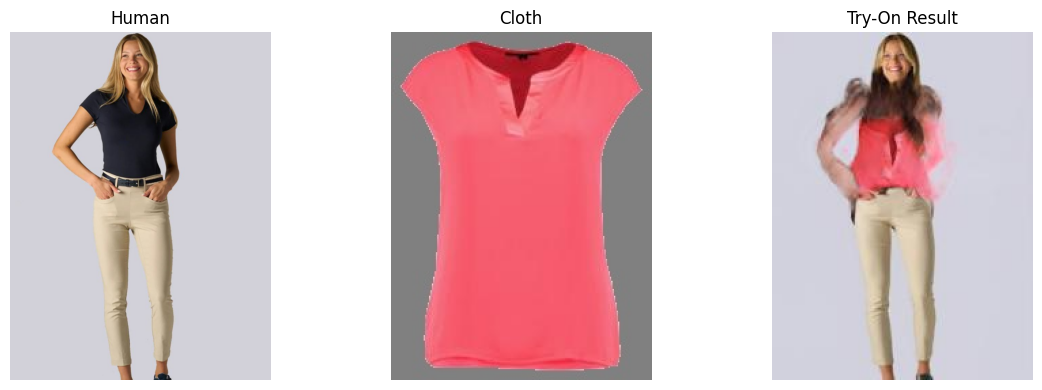

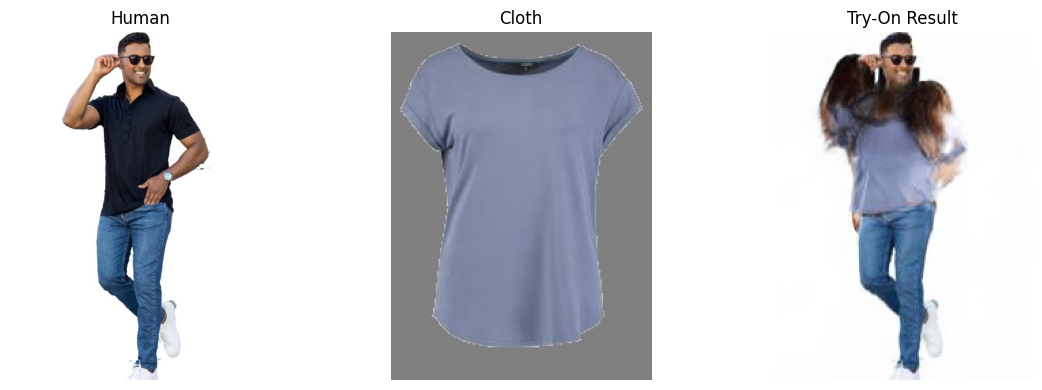

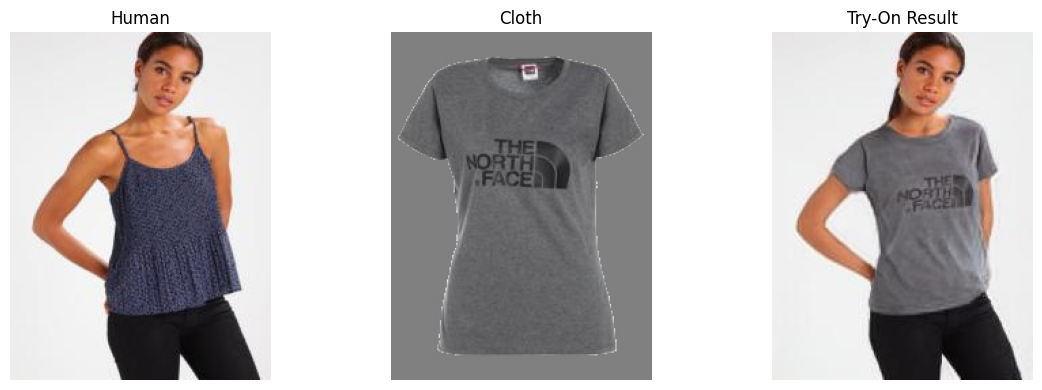

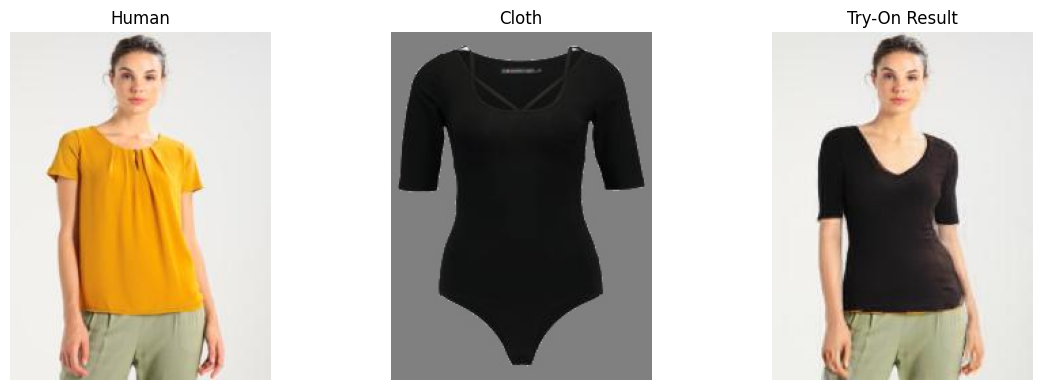

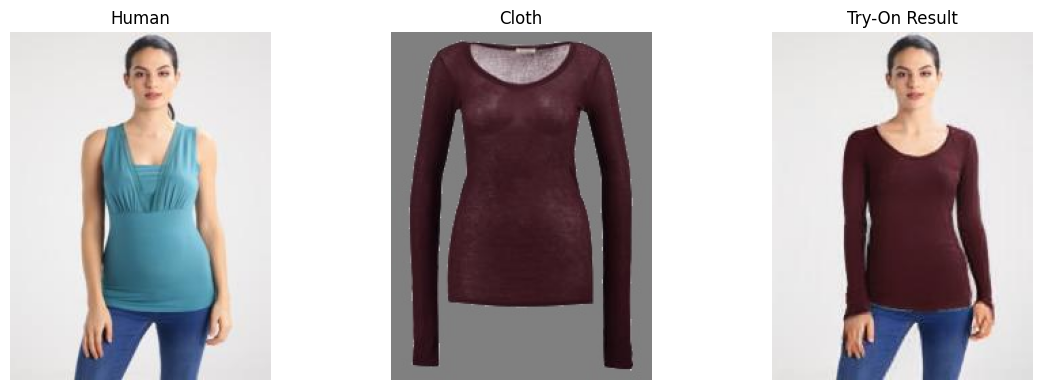

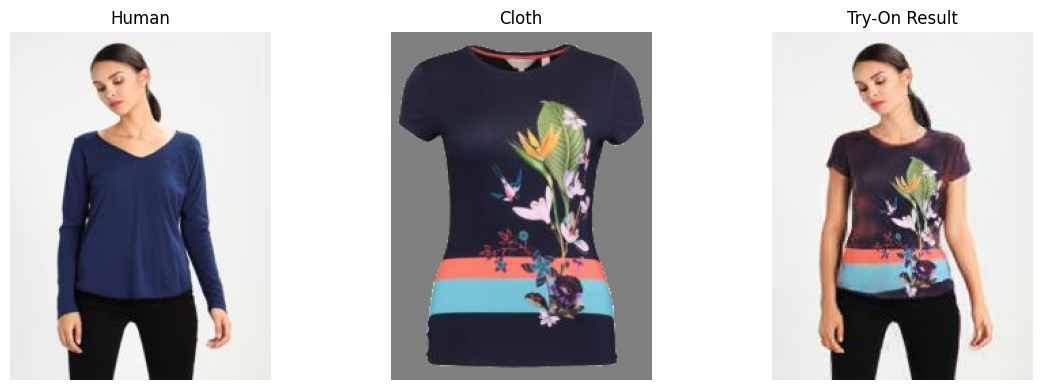

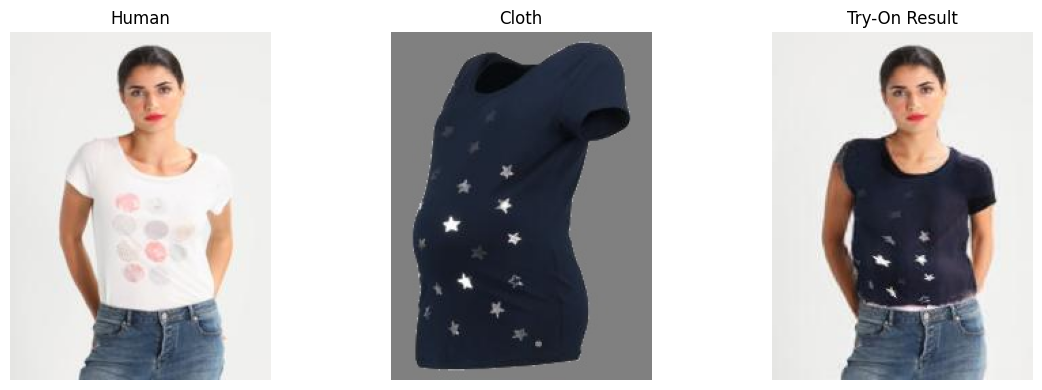

In [6]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# =========================
# PATHS
# =========================
ROOT = "data/VITON"
PAIR_FILE = os.path.join(ROOT, "test_unpairs.txt")

HUMAN_DIR = os.path.join(ROOT, "VITON_test/test_img")
CLOTH_DIR = os.path.join(ROOT, "VITON_test/clothes")
RESULT_DIR = r"results\TEST_UNPAIR\vis_viton_out"

# =========================
# LOAD PAIRS
# =========================
with open(PAIR_FILE, "r") as f:
    pairs = [line.strip().split() for line in f if line.strip()]

# =========================
# VISUALIZE
# =========================
def show_pair(human_name, cloth_name):
    human_path = os.path.join(HUMAN_DIR, human_name)
    cloth_path = os.path.join(CLOTH_DIR, cloth_name)
    result_path = os.path.join(RESULT_DIR, human_name)

    if not (os.path.exists(human_path) and os.path.exists(cloth_path)):
        print(f"Missing input image: {human_name} or {cloth_name}")
        return

    if not os.path.exists(result_path):
        print(f"Missing result image: {human_name}")
        return

    human_img = Image.open(human_path).convert("RGB")
    cloth_img = Image.open(cloth_path).convert("RGB")
    result_img = Image.open(result_path).convert("RGB")

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    axs[0].imshow(human_img)
    axs[0].set_title("Human")
    axs[0].axis("off")

    axs[1].imshow(cloth_img)
    axs[1].set_title("Cloth")
    axs[1].axis("off")

    axs[2].imshow(result_img)
    axs[2].set_title("Try-On Result")
    axs[2].axis("off")

    plt.tight_layout()
    plt.show()

# =========================
# LOOP THROUGH PAIRS
# =========================
for human_name, cloth_name in pairs:
    show_pair(human_name, cloth_name)
